# The Ultimate Matchup
Overall, in the IPLs before 2022, Virat Kohli is the highest run getter while Lasith Malinga is the highest wicket taker. Let's see how these giants of the game stack up against each other. Who has the upper hand?
### Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#to display all rows columns 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

### Importing the dataset

In [2]:
df = pd.read_csv('ipl_ball_by_ball_updated.csv')

In [3]:
df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Slicing the dataset

In [4]:
df.innings.unique()

array([2, 1, 4, 3, 6, 5], dtype=int64)

Innings 3, 4, 5 and 6 represent Super Overs. We shall exclude these from our analysis.

In [5]:
df = df[(df.innings == 1) | (df.innings == 2)]

In [6]:
df.innings.unique()

array([2, 1], dtype=int64)

#### Getting the dataset with Kohli as striker and Malinga as bowler

In [7]:
df.batting_team.unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings'],
      dtype=object)

In [8]:
df[df.batting_team == 'Royal Challengers Bangalore']['striker'].unique()

array(['MV Boucher', 'W Jaffer', 'JH Kallis', 'CL White', 'V Kohli',
       'R Dravid', 'P Kumar', 'Z Khan', 'SB Joshi', 'AA Noffke',
       'B Akhil', 'LRPL Taylor', 'S Chanderpaul', 'R Vinay Kumar',
       'B Chipli', 'DW Steyn', 'Misbah-ul-Haq', 'DT Patil', 'A Kumble',
       'J Arunkumar', 'Abdur Razzak', 'SP Goswami', 'KP Pietersen',
       'RV Uthappa', 'JD Ryder', 'R Bishnoi', 'KV Sharma', 'Pankaj Singh',
       'MK Pandey', 'RE van der Merwe', 'KP Appanna', 'D du Preez',
       'EJG Morgan', 'A Mithun', 'S Sriram', 'AUK Pathan',
       'AB de Villiers', 'TM Dilshan', 'SS Tiwary', 'MA Agarwal',
       'DL Vettori', 'CA Pujara', 'JJ van der Wath', 'R Ninan',
       'S Aravind', 'CH Gayle', 'J Syed Mohammad', 'M Kaif',
       'LA Pomersbach', 'KB Arun Karthik', 'CK Langeveldt', 'AB McDonald',
       'HV Patel', 'RR Bhatkal', 'M Muralitharan', 'P Parameswaran',
       'KK Nair', 'DT Christian', 'MC Henriques', 'M Kartik',
       'JD Unadkat', 'R Rampaul', 'KL Rahul', 'A Mukund', 'Y

In [9]:
df[df.bowling_team == 'Mumbai Indians']['bowler'].unique()

array(['DS Kulkarni', 'Harbhajan Singh', 'A Nehra', 'AM Nayar',
       'ST Jayasuriya', 'SM Pollock', 'MA Khote', 'DJ Bravo',
       'VS Yeligati', 'SD Chitnis', 'CRD Fernando', 'DJ Thornely',
       'RR Raje', 'DR Smith', 'A Nel', 'SL Malinga', 'Z Khan',
       'SR Tendulkar', 'JP Duminy', 'GR Napier', 'C Nanda', 'AM Rahane',
       'RA Shaikh', 'R McLaren', 'R Sathish', 'AG Murtaza', 'KA Pollard',
       'AN Ahmed', 'STR Binny', 'JEC Franklin', 'MM Patel', 'RG Sharma',
       'A Symonds', 'TL Suman', 'RW Price', 'PP Ojha', 'RP Singh',
       'CJ McKay', 'NLTC Perera', 'RJ Peterson', 'R Shukla', 'JJ Bumrah',
       'MG Johnson', 'JDP Oram', 'R Dhawan', 'YS Chahal', 'P Suyal',
       'GJ Maxwell', 'NM Coulter-Nile', 'CJ Anderson', 'P Kumar',
       'LMP Simmons', 'S Gopal', 'K Santokie', 'M de Lange',
       'R Vinay Kumar', 'J Suchith', 'MJ McClenaghan', 'HH Pandya',
       'TG Southee', 'KH Pandya', 'N Rana', 'KV Sharma', 'M Markande',
       'Mustafizur Rahman', 'PJ Sangwan', 'BCJ C

In [10]:
# player 1: V Kohli
# player 2: SL Malinga

In [11]:
req_df = df[(df.striker == 'V Kohli') & (df.bowler == 'SL Malinga')]

In [12]:
req_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
22161,392218,2009,2009-05-10,St George's Park,2,1.4,Royal Challengers Bangalore,Mumbai Indians,V Kohli,JH Kallis,SL Malinga,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22162,392218,2009,2009-05-10,St George's Park,2,1.2,Royal Challengers Bangalore,Mumbai Indians,V Kohli,JH Kallis,SL Malinga,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22163,392218,2009,2009-05-10,St George's Park,2,1.1,Royal Challengers Bangalore,Mumbai Indians,V Kohli,JH Kallis,SL Malinga,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22174,392218,2009,2009-05-10,St George's Park,2,1.3,Royal Challengers Bangalore,Mumbai Indians,V Kohli,JH Kallis,SL Malinga,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43059,501205,2011,2011-04-12,M Chinnaswamy Stadium,1,2.5,Royal Challengers Bangalore,Mumbai Indians,V Kohli,TM Dilshan,SL Malinga,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Metrics
Initially, we shall look at the following base metrics when Kohli and Malinga go head-to-head:
- No. of runs scored
- No. of balls faced
- No. of times dismissed

In [13]:
# runs scored
print('Runs scored:', sum(req_df.runs_off_bat))

Runs scored: 34


In [14]:
# balls faced
print('Balls faced:', len(req_df))

Balls faced: 38


In [15]:
# outs
print('Times dismissed:', len(req_df[req_df.player_dismissed == 'V Kohli']))

Times dismissed: 0


In [16]:
# strike rate
print('Strike rate:', 100*sum(req_df.runs_off_bat)/len(req_df))

Strike rate: 89.47368421052632


### Malinga vs Batsmen
Now, let's see how all batsmen have fared against Malinga in IPLs.

In [17]:
df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
malinga_df = df[df.bowler == 'SL Malinga']

In [19]:
malinga_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
13561,392181,2009,2009-04-18,Newlands,2,19.7,Chennai Super Kings,Mumbai Indians,T Thushara,Joginder Sharma,SL Malinga,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13562,392181,2009,2009-04-18,Newlands,2,19.6,Chennai Super Kings,Mumbai Indians,T Thushara,Joginder Sharma,SL Malinga,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13563,392181,2009,2009-04-18,Newlands,2,19.5,Chennai Super Kings,Mumbai Indians,T Thushara,Joginder Sharma,SL Malinga,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13564,392181,2009,2009-04-18,Newlands,2,19.4,Chennai Super Kings,Mumbai Indians,MS Dhoni,Joginder Sharma,SL Malinga,0,0,NaN,NaN,NaN,NaN,NaN,bowled,MS Dhoni,NaN,NaN
13565,392181,2009,2009-04-18,Newlands,2,19.3,Chennai Super Kings,Mumbai Indians,Joginder Sharma,MS Dhoni,SL Malinga,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# runs scored by each batsman
mdf1 = pd.DataFrame(malinga_df.groupby('striker')['runs_off_bat'].sum()).reset_index()

In [21]:
mdf1.head()

,striker,runs_off_bat
0,A Ashish Reddy,3
1,A Flintoff,0
2,A Kumble,1
3,A Mishra,5
4,A Nehra,0


In [22]:
mdf2 = pd.DataFrame(malinga_df.groupby('striker')['ball'].count()).reset_index()

In [23]:
mdf2.head()

,striker,ball
0,A Ashish Reddy,4
1,A Flintoff,4
2,A Kumble,1
3,A Mishra,15
4,A Nehra,3


In [24]:
mdf3 = mdf1.merge(mdf2, on = 'striker', how = 'left')

In [25]:
mdf3.head(1)

,striker,runs_off_bat,ball
0,A Ashish Reddy,3,4


In [26]:
mdf3['strike_rate'] = 100*mdf3['runs_off_bat']/mdf3['ball']

In [27]:
mdf3.head(1)

,striker,runs_off_bat,ball,strike_rate
0,A Ashish Reddy,3,4,75.0


Let's consider only those batsmen who have faced at least 30 balls against Malinga.

In [28]:
mdf3 = mdf3[mdf3.ball >= 30]

In [29]:
mdf3.head()

,striker,runs_off_bat,ball,strike_rate
11,AB de Villiers,124,64,193.750000
12,AC Gilchrist,34,32,106.250000
22,AM Rahane,48,54,88.888889
35,BB McCullum,81,65,124.615385
37,BJ Hodge,41,43,95.348837


### Kohli vs Bowlers
Now, let's see how Kohli has fared against all the bowlers in IPLs.

In [30]:
kohli_df = df[df.striker =='V Kohli']

In [31]:
# runs conceded by each bowler
kdf1 = pd.DataFrame(kohli_df.groupby('bowler')['runs_off_bat'].sum()).reset_index()

In [32]:
kdf1.head()

,bowler,runs_off_bat
0,A Ashish Reddy,32
1,A Chandila,15
2,A Flintoff,1
3,A Mishra,158
4,A Nehra,60


In [33]:
kdf2 = pd.DataFrame(kohli_df.groupby('bowler')['ball'].count()).reset_index()

In [34]:
kdf2.head()

,bowler,ball
0,A Ashish Reddy,26
1,A Chandila,15
2,A Flintoff,4
3,A Mishra,103
4,A Nehra,57


In [35]:
kdf3 = kdf1.merge(kdf2, on = 'bowler', how = 'left')

In [36]:
kdf3.head(1)

,bowler,runs_off_bat,ball
0,A Ashish Reddy,32,26


In [37]:
kdf3['strike_rate'] = 100*kdf3['runs_off_bat']/kdf3['ball']

In [38]:
kdf3.head()

,bowler,runs_off_bat,ball,strike_rate
0,A Ashish Reddy,32,26,123.076923
1,A Chandila,15,15,100.000000
2,A Flintoff,1,4,25.000000
3,A Mishra,158,103,153.398058
4,A Nehra,60,57,105.263158


Let's consider only those bowlers who have bowled at least 30 balls to Kohli.

In [39]:
kdf3 = kdf3[kdf3.ball >= 30]

In [40]:
mdf3.reset_index(inplace = True, drop = True)
kdf3.reset_index(inplace = True, drop = True)

In [41]:
mdf3.head()

,striker,runs_off_bat,ball,strike_rate
0,AB de Villiers,124,64,193.750000
1,AC Gilchrist,34,32,106.250000
2,AM Rahane,48,54,88.888889
3,BB McCullum,81,65,124.615385
4,BJ Hodge,41,43,95.348837


In [42]:
kdf3.head()

,bowler,runs_off_bat,ball,strike_rate
0,A Mishra,158,103,153.398058
1,A Nehra,60,57,105.263158
2,AB Dinda,36,30,120.000000
3,AD Russell,78,54,144.444444
4,AJ Tye,43,36,119.444444


### Visualisations
Let's see how different batsmen have fared against Malinga.

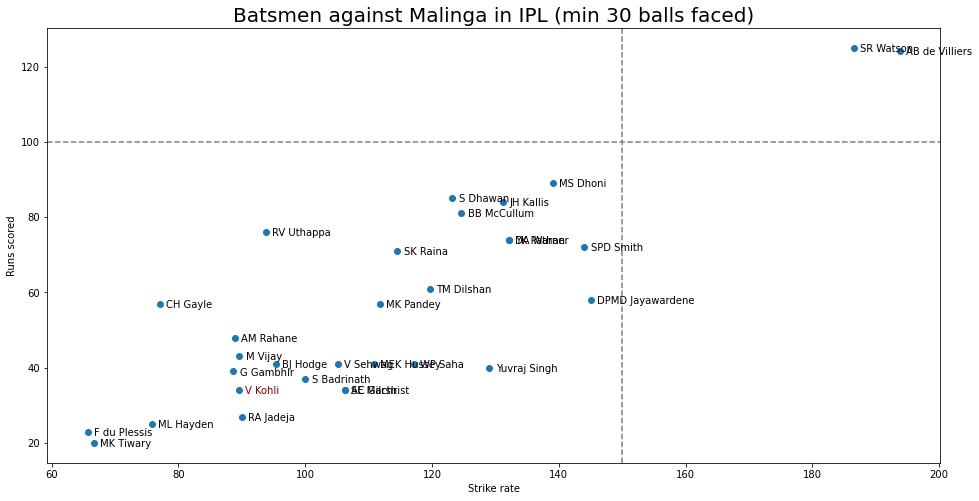

In [43]:
plt.figure(figsize = (16, 8))
plt.scatter(mdf3.strike_rate, mdf3.runs_off_bat)

for i in range(len(mdf3)):
    # plt.text(x, y, text)
    if mdf3.striker[i] == 'V Kohli':
        plt.text(mdf3['strike_rate'][i] + 1, mdf3['runs_off_bat'][i] - 1, mdf3['striker'][i], color='maroon')
    else:
        plt.text(mdf3['strike_rate'][i] + 1, mdf3['runs_off_bat'][i] - 1, mdf3['striker'][i])

plt.axvline(150, ls = '--', color = 'grey')
plt.axhline(100, ls = '--', color = 'grey')
plt.title('Batsmen against Malinga in IPL (min 30 balls faced)', fontsize = 20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.show()

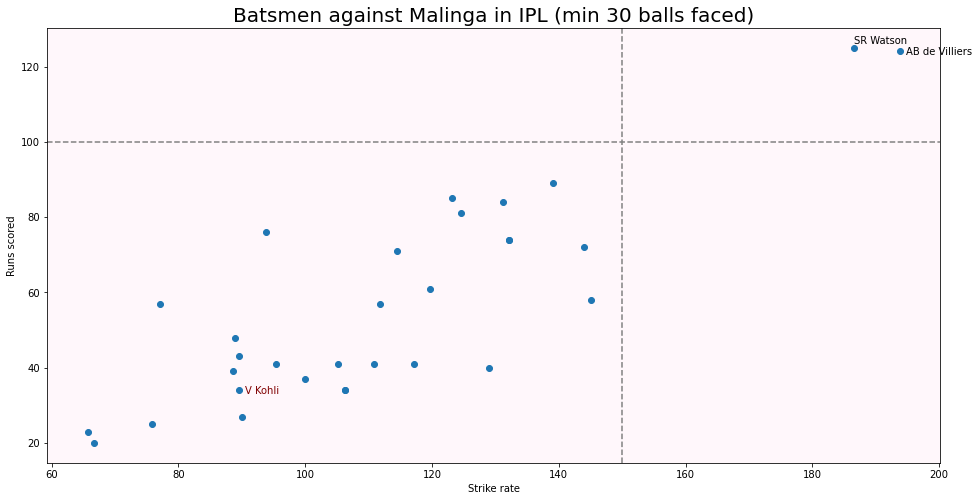

In [44]:
plt.figure(figsize = (16,8))
plt.rcParams['axes.facecolor'] = '#fff7fb'
plt.scatter(mdf3.strike_rate, mdf3.runs_off_bat)

for i in range(len(mdf3)):
    if mdf3.striker[i] == 'V Kohli':
        plt.text(mdf3['strike_rate'][i] + 1, mdf3['runs_off_bat'][i] - 1, mdf3['striker'][i], color='maroon')
    elif (mdf3.striker[i] == 'SR Watson'):
        plt.text(mdf3['strike_rate'][i], mdf3['runs_off_bat'][i] + 1, mdf3['striker'][i])
    elif (mdf3.striker[i] == 'AB de Villiers'):
        plt.text(mdf3['strike_rate'][i] + 1, mdf3['runs_off_bat'][i] - 1, mdf3['striker'][i])
        
plt.axvline(150, ls = '--', color = 'grey')
plt.axhline(100, ls = '--', color = 'grey')
plt.title('Batsmen against Malinga in IPL (min 30 balls faced)', fontsize = 20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.show()

We can see that Virat Kohli has struggled against Lasith Malinga. However, an interesting observation is that Shane Watson and AB de Villiers have totally dominated him by scoring over 120 runs with strike rates in excess of 180!

Now, let's visualise Kohli's performances against all bowlers.

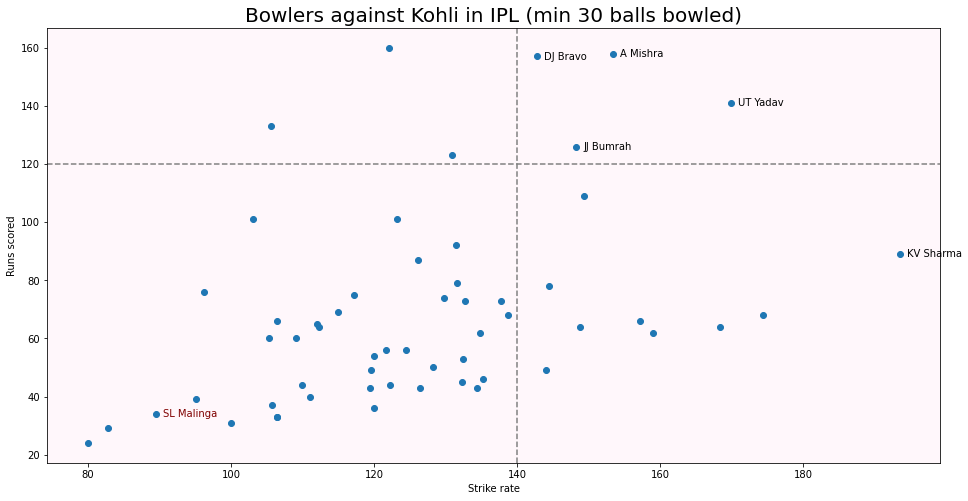

In [45]:
plt.figure(figsize = (16, 8))
plt.scatter(kdf3.strike_rate, kdf3.runs_off_bat)

for i in range(len(kdf3)):
    # plt.text(x, y, text)
    if kdf3.bowler[i] == 'SL Malinga':
        plt.text(kdf3['strike_rate'][i] + 1, kdf3['runs_off_bat'][i] - 1, kdf3['bowler'][i], color='maroon')
    elif (kdf3.bowler[i] == 'DJ Bravo') | (kdf3.bowler[i] == 'A Mishra') | (kdf3.bowler[i] == 'UT Yadav') | (kdf3.bowler[i] == 'JJ Bumrah') | (kdf3.bowler[i] == 'JJ Bumrah') | (kdf3.bowler[i] == 'KV Sharma'):
        plt.text(kdf3['strike_rate'][i] + 1, kdf3['runs_off_bat'][i] - 1, kdf3['bowler'][i])
    
plt.axvline(140, ls = '--', color = 'grey')
plt.axhline(120, ls = '--', color = 'grey')
plt.title('Bowlers against Kohli in IPL (min 30 balls bowled)', fontsize = 20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.show()

Here again, Kohli has struggled against Malinga which we already established in the previous visualisation. However, we can also see that Kohli has dominated Bravo, Mishra, Bumrah and Umesh Yadav with runs scored above 120 and strike rates above 140. There is another outlier, Karn Sharma, against whom Kohli has an overall strike rate touching 200.